# Check distributions used in undelayed-demand




## Set up the notebook environment

In [1]:
# Reload functions every time
%load_ext autoreload 
%autoreload 2

In [2]:
from patientflow.load import set_project_root
project_root = set_project_root()

Inferred project root: /home/jovyan/work/patientflow


## Set file paths

In [50]:
from patientflow.load import set_file_paths
from patientflow.load import load_config_file

# set file locations
# data_folder_name = 'data-raw' 
data_folder_name = 'data-raw-undelayed-demand' 

# set file paths
data_file_path, media_file_path, model_file_path, config_path = set_file_paths(project_root, 
               data_folder_name=data_folder_name, config_file='config-uclh.yaml')

# create subfolders for weekdays and weekends
media_file_path_weekdays = media_file_path / 'undelayed-demand-uclh' / 'weekdays'
media_file_path_weekends = media_file_path / 'undelayed-demand-uclh' / 'weekends'
media_file_path_all_days = media_file_path / 'undelayed-demand-uclh' / 'all_days'

    
media_file_path_weekdays.mkdir(parents=True, exist_ok=True)
media_file_path_weekends.mkdir(parents=True, exist_ok=True)
media_file_path_all_days.mkdir(parents=True, exist_ok=True)

Configuration will be loaded from: /home/jovyan/work/patientflow/config-uclh.yaml
Data files will be loaded from: /home/jovyan/work/patientflow/data-raw-undelayed-demand
Trained models will be saved to: /home/jovyan/work/patientflow/trained-models/raw-undelayed-demand
Images will be saved to: /home/jovyan/work/patientflow/trained-models/raw-undelayed-demand/media


## Load parameters

These are set in config.json. 

In [4]:
# load params from config file
params = load_config_file(config_path)

# prediction_times = params["prediction_times"]
# start_training_set, start_validation_set, start_test_set, end_test_set = params["start_training_set"], params["start_validation_set"], params["start_test_set"], params["end_test_set"]
x1, y1, x2, y2 = params["x1"], params["y1"], params["x2"], params["y2"]
# prediction_window = params["prediction_window"]
# epsilon = float(params["epsilon"])
yta_time_interval = params["yta_time_interval"]

print(f'The aspiration is for {y1*100}% of patients to be admitted within {x1} hours, and {y2*100}% of patients to be admitted within {x2} hours')

The aspiration is for 78.0% of patients to be admitted within 4.0 hours, and 99.0% of patients to be admitted within 12.0 hours


## Load data

Here we load the data. NOTE - the public data is a subset of UCLH arrivals, so the charts here will underestimate the demand at UCLH. 

In [56]:
data_file_path

PosixPath('/home/jovyan/work/patientflow/data-raw-undelayed-demand')

In [68]:
import pandas as pd
import numpy as np
from patientflow.load import load_data

# load data
# inpatient_arrivals = load_data(data_file_path, 
#                     file_name='inpatient_arrivals.csv')

inpatient_arrivals = pd.read_csv(data_file_path /'ed_sdec_ct_3.csv', dayfirst=True, 
                                 low_memory=False)
# For the date parsing
inpatient_arrivals['arrival_datetime'] = pd.to_datetime(
    inpatient_arrivals['arrival_datetime'], 
    dayfirst=True,  # Add this to be consistent with your read_csv parameter
    utc=True
)

inpatient_arrivals.set_index('arrival_datetime', inplace=True)

# select only data from 2023 onwards
inpatient_arrivals = inpatient_arrivals[inpatient_arrivals.index > '2023-01-01']

weekdays = inpatient_arrivals[(inpatient_arrivals.index.weekday < 5) & (inpatient_arrivals.index > '2023-01-01')]
weekends = inpatient_arrivals[(inpatient_arrivals.index.weekday >= 5) & (inpatient_arrivals.index > '2023-01-01')]



In [41]:
df = w.copy().reset_index()

In [70]:
inpatient_arrivals

,HospitalProviderSpellNumber,AdmissionType,is_child,Sex,arrival_day,IsED_Flag,IsSDEC_Flag,IsEDAndSDEC_Flag,SDEC_In_Datetime,Ward_In_Datetime,SiteCode,WardCode,DestinationPatientService,RequestedInstant,SourceWard,DestWard
arrival_datetime,,,,,,,,,,,,,,,,
2023-01-01 00:41:00+00:00,1041073346,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Sunday,1,0,0,NaN,01/01/2023 07:20,UCHC,UCH T08S,Respiratory - General,50:42.0,UCH ED,UCH T08S
2023-01-01 03:09:00+00:00,1041073936,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Sunday,1,1,1,45:00.0,01/01/2023 13:23,UCHC,UCH T14N,NaN,NaN,NaN,NaN
2023-01-01 03:20:00+00:00,1041073046,"Emergency Admission - A&E, Casualty, or Dental...",False,M,Sunday,1,0,0,NaN,31/12/2022 20:21,QSC,NHNN ESU,Acute Medicine,51:51.0,UCH ED,UCH T01 AMU
2023-01-01 05:09:00+00:00,1041074019,"Emergency Admission - A&E, Casualty, or Dental...",False,M,Sunday,1,0,0,NaN,01/01/2023 10:23,UCHC,UCH T09S,Orthopaedics - Lower Limb,52:11.0,UCH ED,UCH T09S
2023-01-01 05:14:00+00:00,1041074023,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Sunday,1,1,1,47:00.0,01/01/2023 17:35,UCHC,UCH T09N,ENT - General,10:06.0,UCH ED,UCH SDEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12 17:00:00+00:00,1060761272,"Emergency Admission - A&E, Casualty, or Dental...",False,F,Wednesday,1,0,0,NaN,12/03/2025 21:26,UCHC,UCH T14S ASU,General Surgery - General,31:14.0,UCH ED,UCH T14S ASU
2025-03-12 17:18:00+00:00,1060760893,"Emergency Admission - A&E, Casualty, or Dental...",False,M,Wednesday,1,0,0,NaN,12/03/2025 22:09,UCHC,UCH T14S ASU,Oncology - Head and Neck - Medical,00:57.0,UCH ED,UCH T14S ASU
2025-03-12 17:22:00+00:00,1060762231,"Emergency Admission - A&E, Casualty, or Dental...",True,F,Wednesday,1,0,0,NaN,12/03/2025 23:54,UCHC,UCH T12S,Paediatric - General,22:58.0,UCH ED,UCH T12S



Whole dataset
Mean: 47.6509
Variance: 71.6582
Variance-to-Mean Ratio: 1.5038


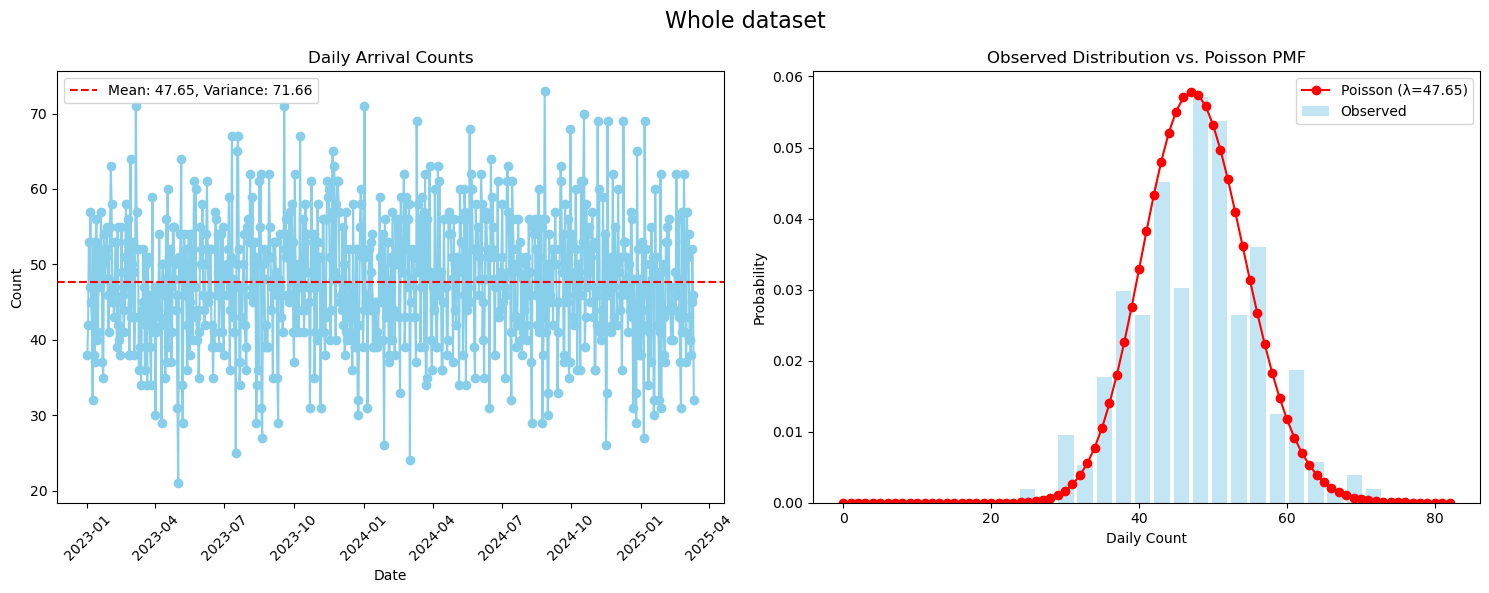


Weekdays
Mean: 50.5550
Variance: 55.3628
Variance-to-Mean Ratio: 1.0951


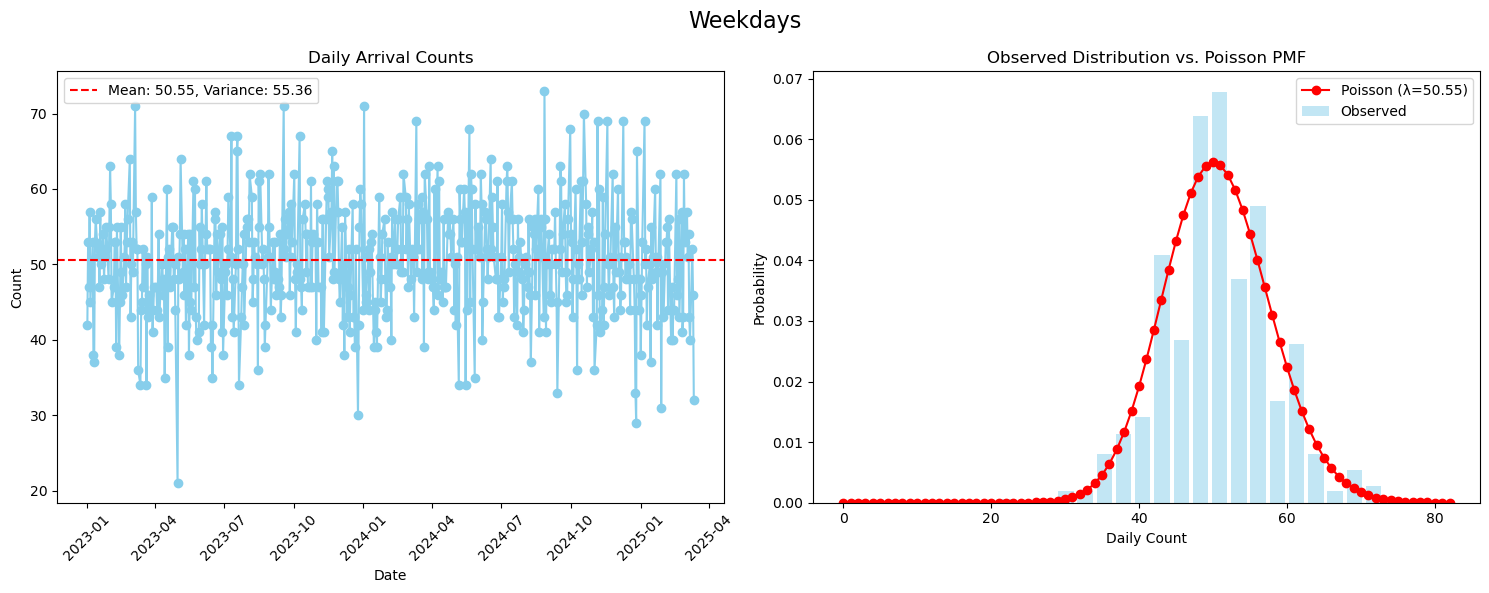


Weekends
Mean: 40.3843
Variance: 38.6236
Variance-to-Mean Ratio: 0.9564


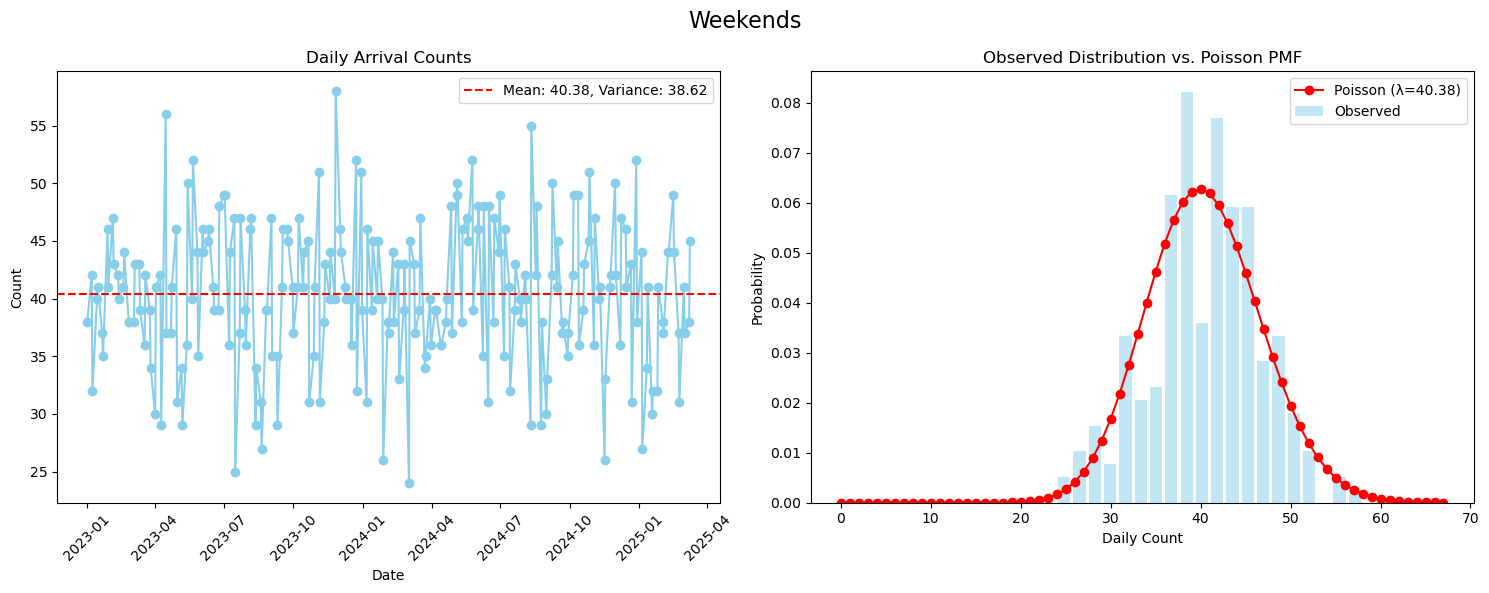

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def compare_with_poisson(df, suptitle):

    print(f"\n{suptitle}")

    df = df.copy(deep=True).reset_index()

    # After calculating the daily counts
    daily_counts = df.groupby(df['arrival_datetime'].dt.date).size()
    daily_counts_df = daily_counts.reset_index(name='count')
    
    # Calculate mean and variance
    mean_count = daily_counts_df['count'].mean()
    variance_count = daily_counts_df['count'].var()
    
    # Print the comparison
    print(f"Mean: {mean_count:.4f}")
    print(f"Variance: {variance_count:.4f}")
    print(f"Variance-to-Mean Ratio: {variance_count/mean_count:.4f}")
    
    
    
    # Generate Poisson PMF based on the mean
    max_count = daily_counts_df['count'].max()
    count_range = np.arange(0, max_count + 10)
    poisson_pmf = stats.poisson.pmf(k=count_range, mu=mean_count)
    
    # Create the plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(suptitle, fontsize=16)

    
    # Plot 1: Daily counts over time
    ax1.plot(daily_counts_df['arrival_datetime'], daily_counts_df['count'], 'o-', color='skyblue')
    ax1.axhline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}, Variance: {variance_count:.2f}')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Count')
    ax1.set_title('Daily Arrival Counts')
    ax1.legend()
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # Plot 2: Comparison with Poisson distribution
    # Histogram of observed counts
    n_bins = min(20, max_count + 1)  # Adjust number of bins based on max count
    observed_hist, bins = np.histogram(daily_counts_df['count'], bins=n_bins, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    ax2.bar(bin_centers, observed_hist, width=(bins[1]-bins[0])*0.8, alpha=0.5, color='skyblue', label='Observed')
    ax2.plot(count_range, poisson_pmf, 'ro-', label=f'Poisson (λ={mean_count:.2f})')
    ax2.set_xlabel('Daily Count')
    ax2.set_ylabel('Probability')
    ax2.set_title('Observed Distribution vs. Poisson PMF')
    ax2.legend()

    plt.tight_layout()
    plt.show()


compare_with_poisson(inpatient_arrivals, "Whole dataset")
compare_with_poisson(weekdays, "Weekdays")
compare_with_poisson(weekends, "Weekends")